<a href="https://colab.research.google.com/github/unknown-jun/First_step_of_data_analist/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 로드

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set() # setting seaborn default for plots

In [5]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Sex'].size
train['Sex'].value_counts(sort=False).index

Index(['female', 'male'], dtype='object')

In [9]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출
    feature_size = feature_ratio.size
    # 전체 데이터 수
    feature_index = feature_ratio.index
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출한 값의 index를 가지고 옴
    survived = train[train['Survived'] == 1] [feature].value_counts()
    # Survivde 에서 1인 값들을 기준으로 feature의 값들을 추출
    dead = train[train['Survived']==0][feature].value_counts()
    # Survivde 에서 0인 값들을 기준으로 feature의 값들을 추출

    plt.plot(aspect='auto')
    plt.pie(feature_ratio,labels=feature_index, autopct = '%1.1f%%')
    # autopct = 퍼센트 단위를 정해줌
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index)+ '\'s ratio')

    plt.show

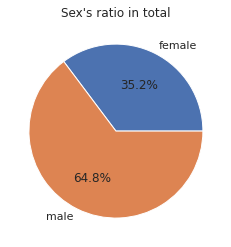

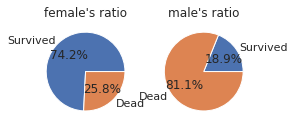

In [10]:
pie_chart('Sex')

In [14]:
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [18]:
train.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [24]:
train.groupby('Embarked')['Fare'].agg([max, min])

,max,min
Embarked,,
C,512.3292,4.0125
Q,90.0000,6.7500
S,263.0000,0.0000


In [25]:
train.groupby('Pclass')['Fare'].agg([max, min])

,max,min
Pclass,,
1,512.3292,0.0
2,73.5000,0.0
3,69.5500,0.0


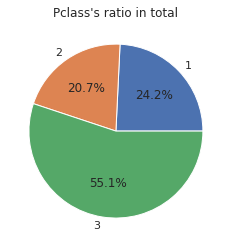

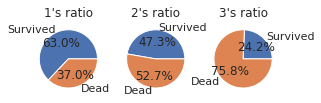

In [22]:
pie_chart('Pclass')

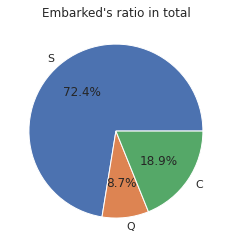

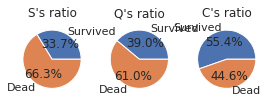

In [15]:
pie_chart('Embarked')

이름을 통한 나이 계산  
티켓을 통한 생존률 변화  
티켓 가격이 0인 사람들은 승무원일 것이다.  
승무원의 생존률은 어떨까?  
파트너의 수에 따른 생존률은 어떨까?  

- c 클래스가 생존율이 비교적 높으며 가장 숫자가 적으며 평균 요금이 가장 높다.  
- 1 등실 생존률은 63%인데 반해, 3 등급 생존률은 24.2%에 불과하다.
- Fare가 0인 사람들은 1명만이 살아남았다.

In [37]:
train[train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [43]:
train['Ticket'].count()

891

In [55]:
# Survived = train[['Survived']==1]
train.groupby([train['SibSp'],train['Survived']])['PassengerId'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

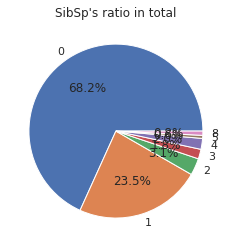

KeyError: ignored

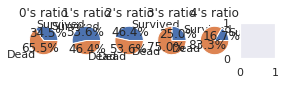

In [64]:
pie_chart('SibSp')

In [ ]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출
    feature_size = feature_ratio.size
    # 전체 데이터 수
    feature_index = feature_ratio.index
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출한 값의 index를 가지고 옴
    survived = train[train['Survived'] == 1] [feature].value_counts()
    # Survivde 에서 1인 값들을 기준으로 feature의 값들을 추출
    dead = train[train['Survived']==0][feature].value_counts()
    # Survivde 에서 0인 값들을 기준으로 feature의 값들을 추출

    plt.plot(aspect='auto')
    plt.pie(feature_ratio,labels=feature_index, autopct = '%1.1f%%')
    # autopct = 퍼센트 단위를 정해줌
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index)+ '\'s ratio')

    plt.show